In [1]:
from xgboost import XGBClassifier

In [3]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # For scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical data
pd.set_option('display.max_rows', 500)

# Dataset Zidan

In [4]:
df_train = pd.read_csv("try out_TRAIN_zidan.csv")
df_test = pd.read_csv("try out_TEST_zidan(1).csv")

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [7]:
# Initialize the XGBClassifier model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)

# Train the model
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [8]:
# Melakukan prediksi pada data test
y_pred_xgb = xgb.predict(X_test)

In [9]:
y_pred_xgb

array([0, 0, 1, ..., 0, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

y_pred_proba = xgb.predict_proba(X_test)[:,1]
#y_pred_custom = (y_pred_proba <= 0.4).astype(int)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.648102145580504


In [11]:
y_pred = y_pred_xgb

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7482724419946994
Precision: 0.13378763646477992
Recall: 0.3887654071529602
F1-Score: 0.19906880496637352
Confusion Matrix:
[[44097 12457]
 [ 3025  1924]]


In [15]:
y_pred_xgb_real = xgb.predict(df_test)

In [16]:
y_pred_df = pd.DataFrame(y_pred_xgb_real, columns=['TARGET'])
y_pred_df

,TARGET
0,0
1,1
2,0
3,0
4,1
...,...
48739,0
48740,1
48741,0
48742,0


In [18]:
df_id_df = pd.DataFrame(df_test, columns=["SK_ID_CURR"])
df_id_df

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [19]:
final_sub = pd.concat([df_id_df, y_pred_df ], axis=1)
final_sub

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,1
48741,456223,0
48742,456224,0


In [20]:
final_sub.to_csv("submit_zidan_xgb.csv", index=False)

### Explainable AI

In [24]:
import shap

#3. Menghitung SHAP Values
# Membuat explainer menggunakan TreeExplainer untuk model berbasis pohon
explainer = shap.TreeExplainer(xgb)

# Menghitung SHAP values untuk data uji
shap_values = explainer.shap_values(X_test)
shap_values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02961999],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01447101],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03190365],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0136275 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01249325],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02342284]], dtype=float32)

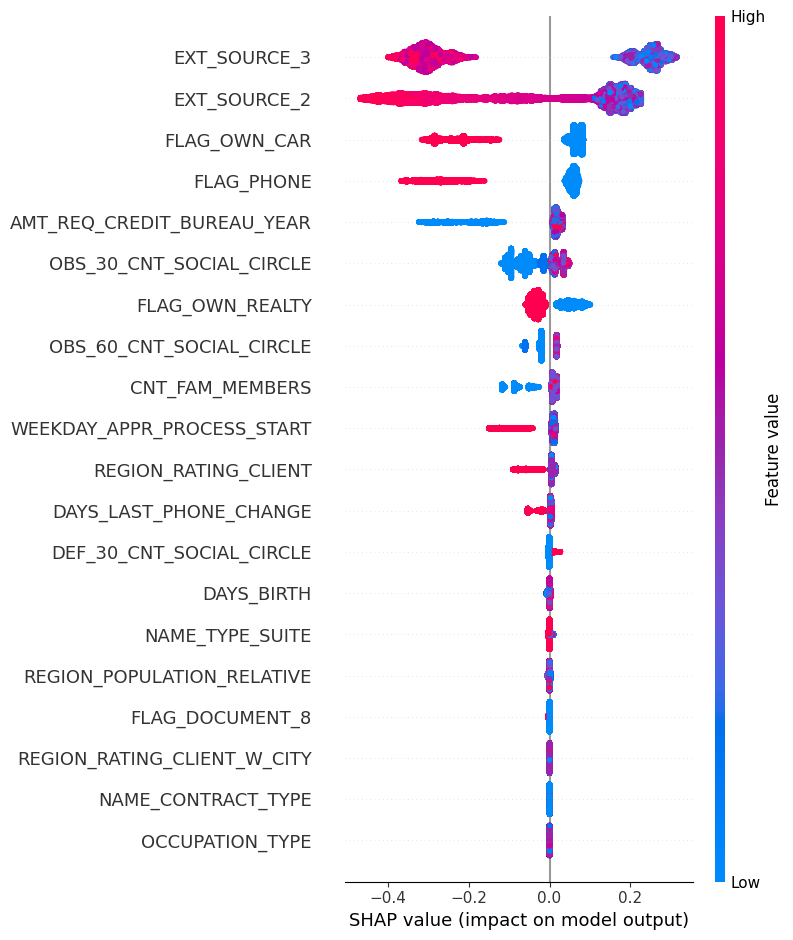

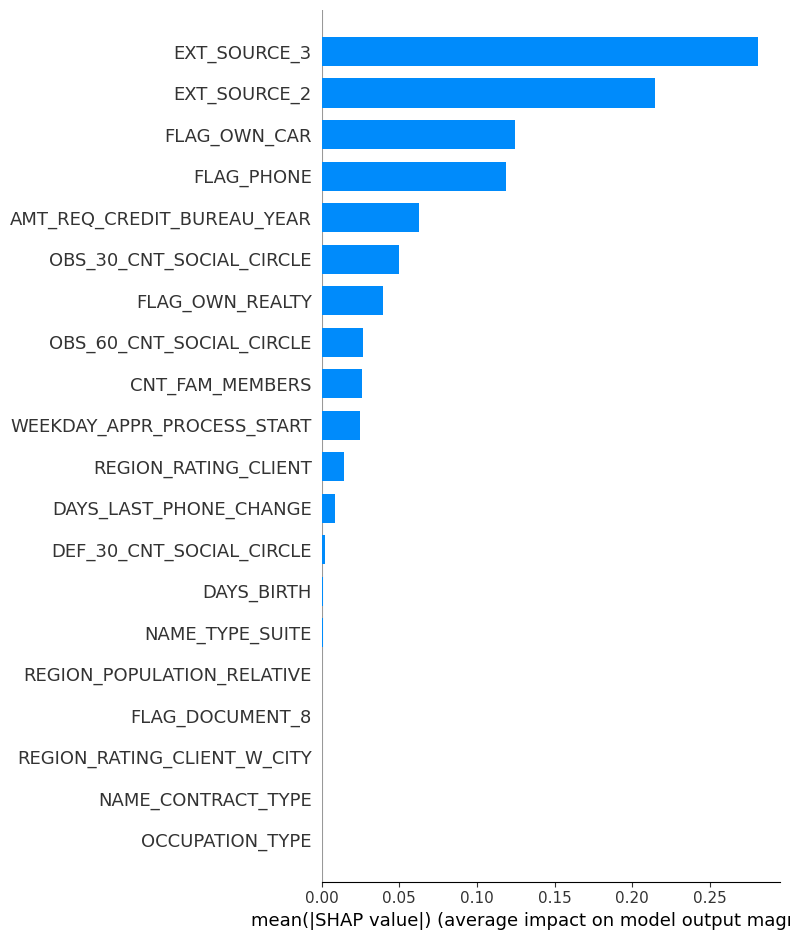

IndexError: invalid index to scalar variable.

In [25]:
#4. Visualisasi
#Summary Plot: Visualisasi pentingnya fitur secara keseluruhan.
# Summary plot untuk kelas 1 (misalnya, jika klasifikasi biner)
shap.summary_plot(shap_values, X_test)

#Feature Importance Plot: Menunjukkan fitur yang paling berkontribusi terhadap prediksi.
shap.summary_plot(shap_values, X_test, plot_type="bar")



In [33]:
#Force Plot: Menunjukkan kontribusi setiap fitur terhadap prediksi untuk satu contoh.
# Visualisasi untuk satu prediksi
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed